In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style="darkgrid")

#### This file represents some EDA that was made for the competition. Unfortunately, I didn't manage to do everything I wanted, because I had started my work on the competition about a week before its end.

#### All workings (including the second file) are made by me.

* Let's upload the file and look at it. 

In [2]:
file_ = pd.read_csv('/Users/freezylex/Downloads/Alfa battle/f1.csv', index_col='Unnamed: 0')
file_

,app_id,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number
0,0,0.465425,1,4,98,4,2,3,7,3,2,1,37,2,4,19,351,34,-1,1
1,0,0.000000,1,2,98,7,1,3,7,3,2,1,49,2,4,20,351,34,0,2
2,0,0.521152,1,2,98,3,1,3,7,3,2,1,37,2,4,20,351,34,0,3
3,0,0.356078,1,1,5,2,1,3,7,3,10,1,49,7,2,0,348,34,52,4
4,0,0.000000,1,2,98,7,1,3,7,3,2,1,49,2,4,16,337,53,280,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105226,23646,0.390944,1,1,37,2,1,1,3,1,1,1,3,1,6,9,2,48,32,453
105227,23646,0.428447,1,1,37,2,1,1,3,1,39,1,120,7,5,12,1,48,27,454
105228,23646,0.371478,1,1,37,2,1,1,3,1,22,1,2,9,5,13,1,48,1,455
105229,23646,0.348726,1,1,37,2,1,1,3,1,22,1,3,9,5,13,1,48,1,456


* Almost all features are categorical; only 'amnt', 'hour_diff' are numerical.

* We have enough data to reconstruct time.

In [3]:
print('Currently {} MB are used'.format(np.round(file_.memory_usage().sum() / 1024**2),6))

Currently 867.0 MB are used


In [4]:
###Function is taken from one of kaggle competitions.

def reduce_mem_usage(df):
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in tqdm(df.columns):
        if df[col].dtype != object:  # Exclude strings

            # make variables for Int, max and min
            IsInt = False
            col_max_value = df[col].max()
            col_min_value = df[col].min()

            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(col_min_value - 1, inplace=True)

            # test if column can be converted to an integer
            col_as_int = df[col].fillna(0).astype(np.int64)
            diff = (df[col] - col_as_int)
            diff = diff.sum()
            if np.abs(diff) < 0.01:
                IsInt = True

            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if col_min_value >= 0:
                    if col_max_value < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif col_max_value < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif col_max_value < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if col_min_value > np.iinfo(np.int8).min and col_max_value < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif col_min_value > np.iinfo(np.int16).min and col_max_value < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif col_min_value > np.iinfo(np.int32).min and col_max_value < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif col_min_value > np.iinfo(np.int64).min and col_max_value < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    

            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)

    return df, NAlist

In [5]:
file, na_list = reduce_mem_usage(file_)
del file_
file

100%|██████████| 20/20 [00:06<00:00,  2.89it/s]


,app_id,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number
0,0,0.465425,1,4,98,4,2,3,7,3,2,1,37,2,4,19,351,34,-1,1
1,0,0.000000,1,2,98,7,1,3,7,3,2,1,49,2,4,20,351,34,0,2
2,0,0.521152,1,2,98,3,1,3,7,3,2,1,37,2,4,20,351,34,0,3
3,0,0.356078,1,1,5,2,1,3,7,3,10,1,49,7,2,0,348,34,52,4
4,0,0.000000,1,2,98,7,1,3,7,3,2,1,49,2,4,16,337,53,280,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105226,23646,0.390944,1,1,37,2,1,1,3,1,1,1,3,1,6,9,2,48,32,453
105227,23646,0.428447,1,1,37,2,1,1,3,1,39,1,120,7,5,12,1,48,27,454
105228,23646,0.371478,1,1,37,2,1,1,3,1,22,1,2,9,5,13,1,48,1,455
105229,23646,0.348726,1,1,37,2,1,1,3,1,22,1,3,9,5,13,1,48,1,456


In [6]:
print('After reducing memory: {} MB'.format(np.round(file.memory_usage().sum()/1024**2),6))

After reducing memory: 181.0 MB


## Upload train file with answers

In [7]:
train_target = pd.read_csv('/Users/freezylex/Downloads/Alfa battle/alfabattle2_train_target.csv')
train_target

,app_id,product,flag
0,0,3,0
1,1,1,0
2,2,1,0
3,3,1,0
4,4,1,0
...,...,...,...
963806,1003045,1,0
963807,1003047,0,0
963808,1003048,1,0
963809,1003049,0,0


## Some EDA

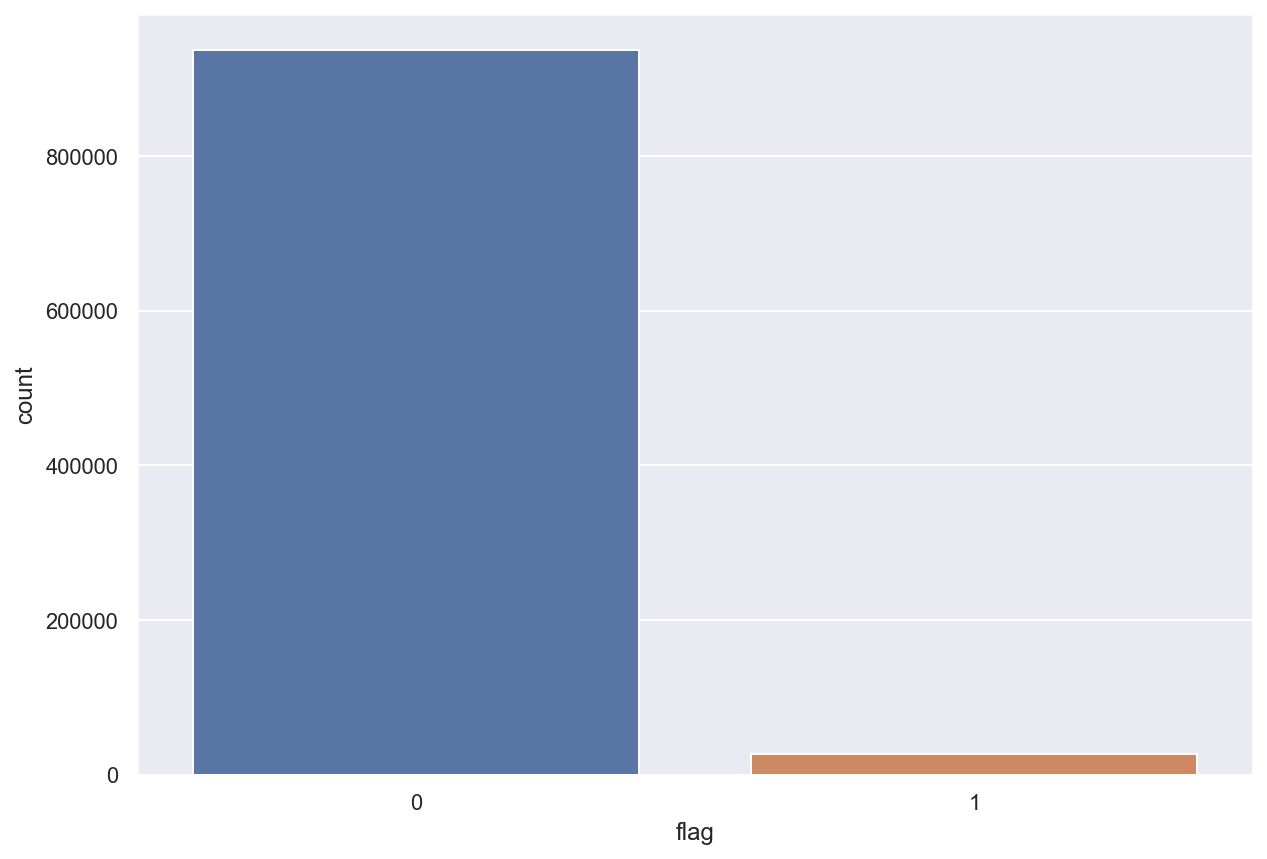

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(train_target['flag'])
plt.show()

* We see that there is a very big disbalance between 2 classes. This will complicate the situation.

* FOR FURTHER COMPETITIONS: A good idea will probably be oversampling. I didn't manage to realize it here, but, as they say, live and learn.

## Income_flag

* Let's try to work with this feature. It's said to be a type of the operations: charge money from the card or put money on the card

In [9]:
file['income_flag'].unique()

array([3, 1, 2], dtype=uint8)

* Binary feature and 3 unique values - interesting

In [10]:
print('Ratio of income_flag = 1 to all dataset = {}'.format(len(
    file[file['income_flag']==1])/len(file)))
print('Ratio of income_flag = 2 to all dataset = {}'.format(len(
    file[file['income_flag']==2])/len(file)))
print('Ratio of income_flag = 3 to all dataset = {}'.format(len(
    file[file['income_flag']==3])/len(file)))

Ratio of income_flag = 1 to all dataset = 0.917651878990831
Ratio of income_flag = 2 to all dataset = 0.08233591832931261
Ratio of income_flag = 3 to all dataset = 1.2202679856407739e-05


* It's clear that income_flag = 3 - some kind of anomaly: probably the transaction didn't work out, or was cancelled, etc.

* We need to get rid of it (will include into one of features)

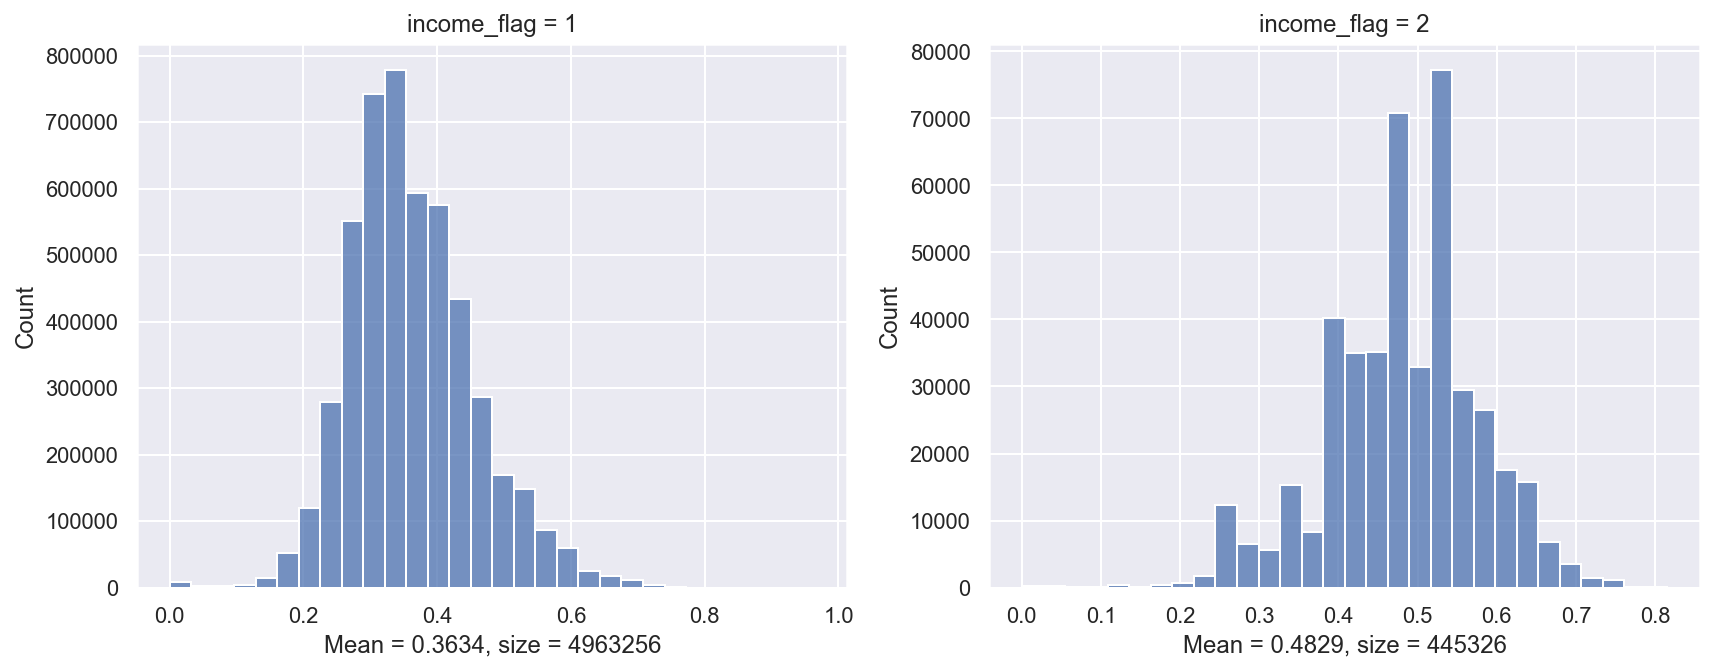

In [11]:
file = file[file['income_flag']!=3]

fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(file[file['income_flag']==1]['amnt'], bins=30, ax=ax[0])
plt.setp(ax[0],xlabel='Mean = {}, size = {}'.format(np.round(np.mean(file[file['income_flag']==1]['amnt']),4), len(file[file['income_flag']==1]['amnt'])),
        title='income_flag = 1')

sns.histplot(file[file['income_flag']==2]['amnt'], bins=30, ax=ax[1])
plt.setp(ax[1], xlabel='Mean = {}, size = {}'.format(np.round(np.mean(file[file['income_flag']==2]['amnt']),4), len(file[file['income_flag']==2]['amnt'])),
        title='income_flag = 2')

plt.show()


* It is reasonable to assume that people's mean amount of money they charge from the card is usually less than mean amount of money the recieve, because the last is cleary connected with wages.

* Moreover, the number of 'income_flag=2' transactions is almost 10 times lower that 'income_flag=1' transactions. It proves the theory, because people do not put money on the card quite often. Instead, we make purchases way more often (at least in Russia).

* Now we can turn charges from the card into negative values.

In [12]:
file.loc[file['income_flag']==1, 'amnt'] = -1*file[file['income_flag']==1]['amnt']
file

,app_id,amnt,currency,operation_kind,card_type,operation_type,operation_type_group,ecommerce_flag,payment_system,income_flag,mcc,country,city,mcc_category,day_of_week,hour,days_before,weekofyear,hour_diff,transaction_number
6,0,-0.258972,1,2,98,3,1,1,6,1,2,1,2,2,2,18,334,53,75,7
7,0,-0.297589,1,2,98,3,1,1,6,1,2,1,2,2,2,19,327,52,169,8
8,0,-0.356078,1,1,5,2,1,1,2,1,10,1,49,7,7,13,326,52,18,9
9,0,-0.333547,1,1,5,2,1,1,2,1,10,1,49,7,7,13,326,52,0,10
10,0,-0.473266,1,2,98,3,1,1,6,1,2,1,2,2,2,15,320,50,146,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105226,23646,-0.390944,1,1,37,2,1,1,3,1,1,1,3,1,6,9,2,48,32,453
105227,23646,-0.428447,1,1,37,2,1,1,3,1,39,1,120,7,5,12,1,48,27,454
105228,23646,-0.371478,1,1,37,2,1,1,3,1,22,1,2,9,5,13,1,48,1,455
105229,23646,-0.348726,1,1,37,2,1,1,3,1,22,1,3,9,5,13,1,48,1,456


## Operation_type_group

* Time to move to another binary (at least, as the orgs say) feature - Operation_type_group

* This variable, as the orgs say, is meant to determine wether it was credit card or debit card

In [37]:
file['operation_type_group'].unique()

array([1, 2, 3], dtype=int8)

In [38]:
print('Ratio of operation_type_group = 1 to all dataset = {}'.format(len(
    file[file['operation_type_group']==1])/len(file)))
print('Ratio of operation_type_group = 2 to all dataset = {}'.format(len(
    file[file['operation_type_group']==2])/len(file)))
print('Ratio of operation_type_group = 3 to all dataset = {}'.format(len(
    file[file['operation_type_group']==3])/len(file)))

Ratio of operation_type_group = 1 to all dataset = 0.9204431032015415
Ratio of operation_type_group = 2 to all dataset = 0.07814192333591319
Ratio of operation_type_group = 3 to all dataset = 0.0014149734625452661


* Again, we have 3 unique values for binary feature - let's think that it was again some kind of techincal mistake at the time of processing the data.

* Let's try to check the balance by the moment the decision about scoring a client is made - we will look at the remaining sum of money

* Since numpy need to cast uint to int when we will be slicing on index, I need to return astype to np.int8

In [24]:
file['operation_type_group'] = file['operation_type_group'].astype(np.int8)
pd.pivot_table(data=file, index=['app_id', 'operation_type_group'], aggfunc='sum')

amnt  card_type    city  country  currency  \
app_id operation_type_group                                                     
0      1                     -59.841976     9272.0  3173.0    179.0     165.0   
       2                       4.467268      701.0   442.0     10.0      10.0   
1      1                    -114.082115    18522.0  5919.0    366.0     343.0   
       2                       3.644963      486.0   189.0      9.0       9.0   
2      1                     -63.824810    11016.0  8794.0    216.0     216.0   
...                                 ...        ...     ...      ...       ...   
23644  2                       5.481539      708.0   222.0     12.0      12.0   
23645  1                     -65.141457    15908.0  2109.0    278.0     212.0   
       2                       1.814759      246.0     3.0      3.0       3.0   
23646  1                    -139.591492    14752.0  1888.0    455.0     448.0   
       2                       3.570669      109.0    27.0      9.0       9.0   

                             day_of_week  days_before  ecommerce_flag    hour  \
app_id operation_type_group                                                     
0      1                           699.0      25055.0           171.0  2378.0   
       2                            36.0       1277.0            10.0   128.0   
1      1                          1325.0      56873.0           396.0  5044.0   
       2                            35.0       1267.0             9.0   129.0   
2      1                           878.0      36238.0           299.0  3474.0   
...                                  ...          ...             ...     ...   
23644  2                            48.0       1574.0            13.0   119.0   
23645  1                           759.0      22650.0           205.0  2787.0   
       2                            11.0        798.0             3.0    53.0   
23646  1                          1774.0      60432.0           477.0  6126.0   
       2                            32.0       1963.0             9.0    98.0   

                             hour_diff  income_flag     mcc  mcc_category  \
app_id operation_type_group                                                 
0      1                          6713        169.0  1325.0         546.0   
       2                          1031         20.0    27.0          20.0   
1      1                          8042        343.0  3345.0        1657.0   
       2                           405         18.0    18.0          18.0   
2      1                          7768        219.0  4148.0        1111.0   
...                                ...          ...     ...           ...   
23644  2                           158         24.0    31.0          24.0   
23645  1                          8040        203.0  2792.0        1046.0   
       2                           214          6.0     6.0           6.0   
23646  1                          8431        448.0  3423.0        1190.0   
       2                           144         18.0    52.0          17.0   

                             operation_kind  operation_type  payment_system  \
app_id operation_type_group                                                   
0      1                              281.0           583.0           549.0   
       2                               39.0            42.0            31.0   
1      1                              430.0           858.0           948.0   
       2                               36.0            36.0            27.0   
2      1                              402.0          1243.0           479.0   
...                                     ...             ...             ...   
23644  2                               47.0            55.0            35.0   
23645  1                              212.0           330.0           292.0   
       2                               12.0            12.0             9.0   
23646  1                              581.0          145

In [39]:
remainings = pd.pivot_table(data=file, index=['app_id', 'operation_type_group'], aggfunc='sum')['amnt']
remainings

app_id  operation_type_group
0       1                       -59.841976
        2                         4.467268
1       1                      -114.082115
        2                         3.644963
2       1                       -63.824810
                                   ...    
23644   2                         5.481539
23645   1                       -65.141457
        2                         1.814759
23646   1                      -139.591492
        2                         3.570669
Name: amnt, Length: 44205, dtype: float32

In [43]:
oper_type_1 = pd.DataFrame(remainings).query('operation_type_group == 1')['amnt'].values
oper_type_2 = pd.DataFrame(remainings).query('operation_type_group == 2')['amnt'].values

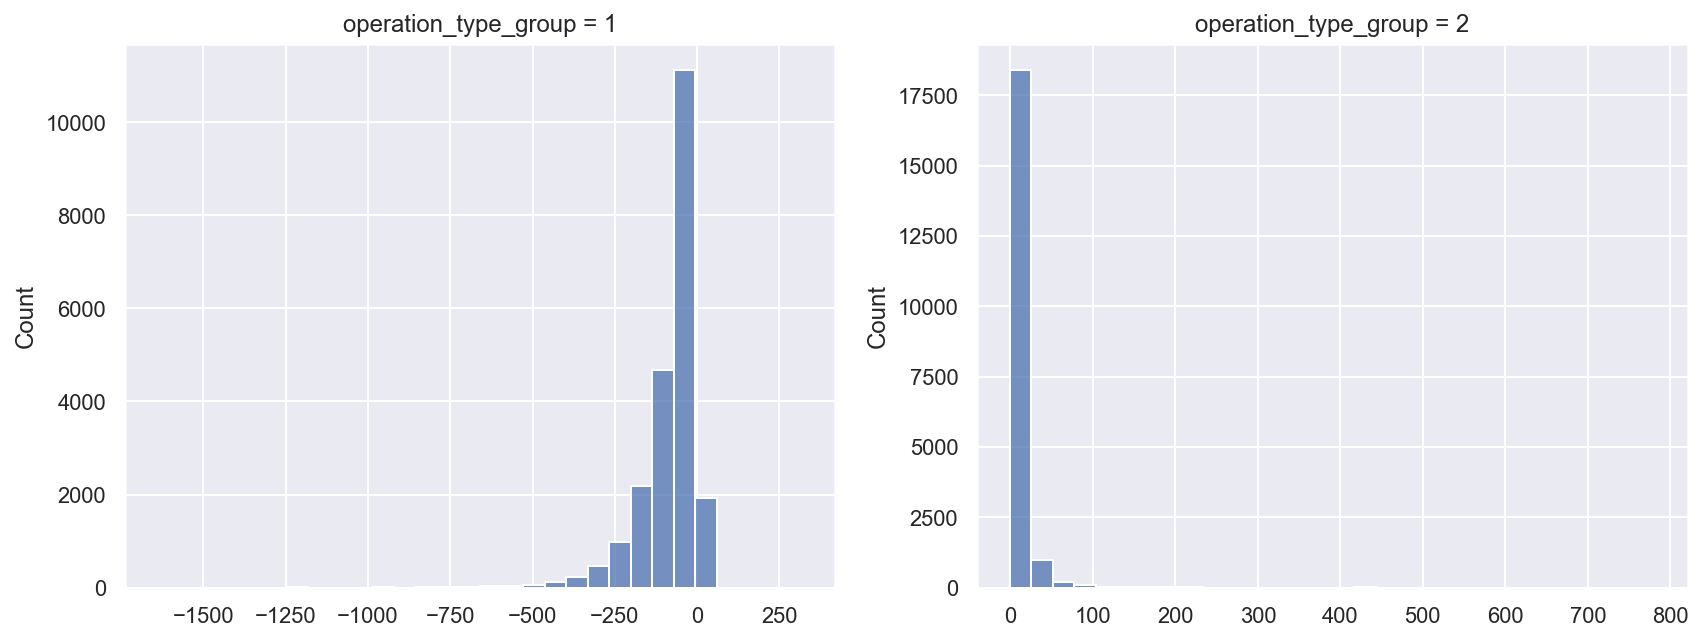

In [45]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(oper_type_1, bins=30, ax=ax[0])
plt.setp(ax[0], title='operation_type_group = 1')

sns.histplot(oper_type_2, bins=30, ax=ax[1])
plt.setp(ax[1], title='operation_type_group = 2')

plt.show()

* I suppose that it's reasonable enough to assume that 'operation_type_group = 1' - credit card. It's impossible in most banks to have overdraft on the debit card, so lack of negative values on 'operation_type_group=2' shows that clearly.

* At the same time, not all people have both credit and debit card.

In [59]:
print('Number of credit cards = {};\nNumber of debit cards = {};\n\
Number of clients = {}.'.format(len(oper_type_1), 
                              len(oper_type_2),
                              len(file['app_id'].unique())))

Number of credit cards = 21871;
Number of debit cards = 19751;
Number of clients = 22743.


## Operation kind

* Let's proceed to categorical variable

* According to its name, this feature displays the type of transaction: maybe, it could be wages; spendings; or something else.

* Let's look at the distribution of 'amnt' for every unique value in this column

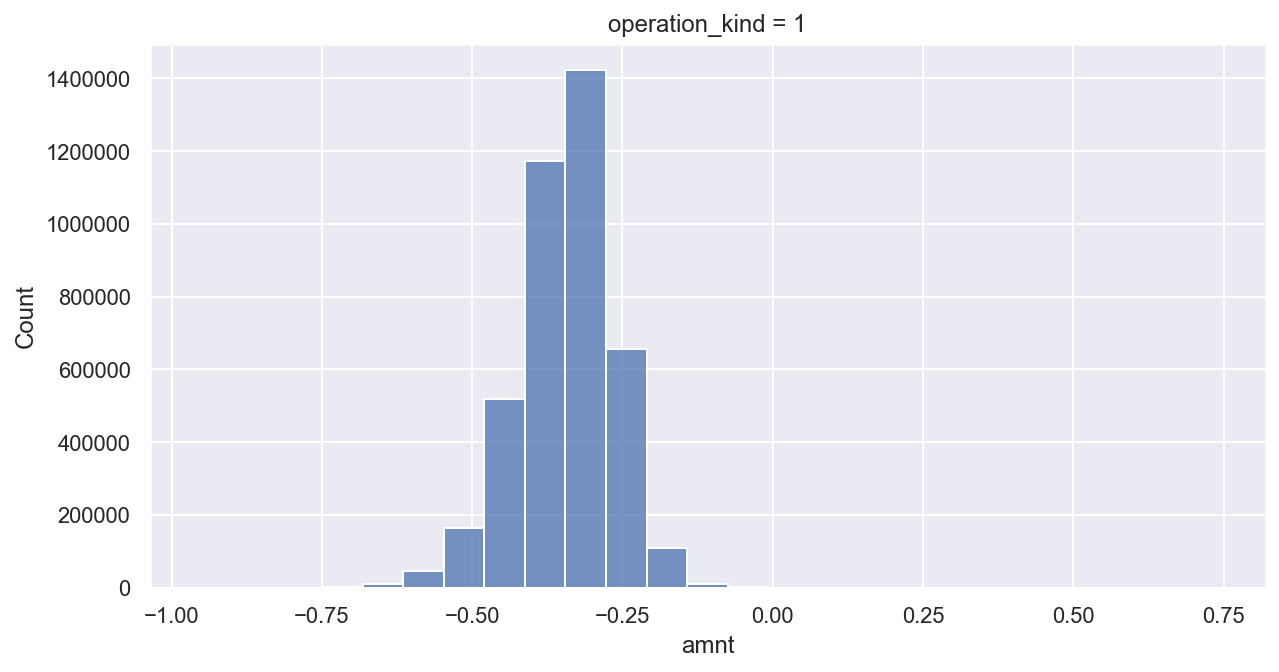

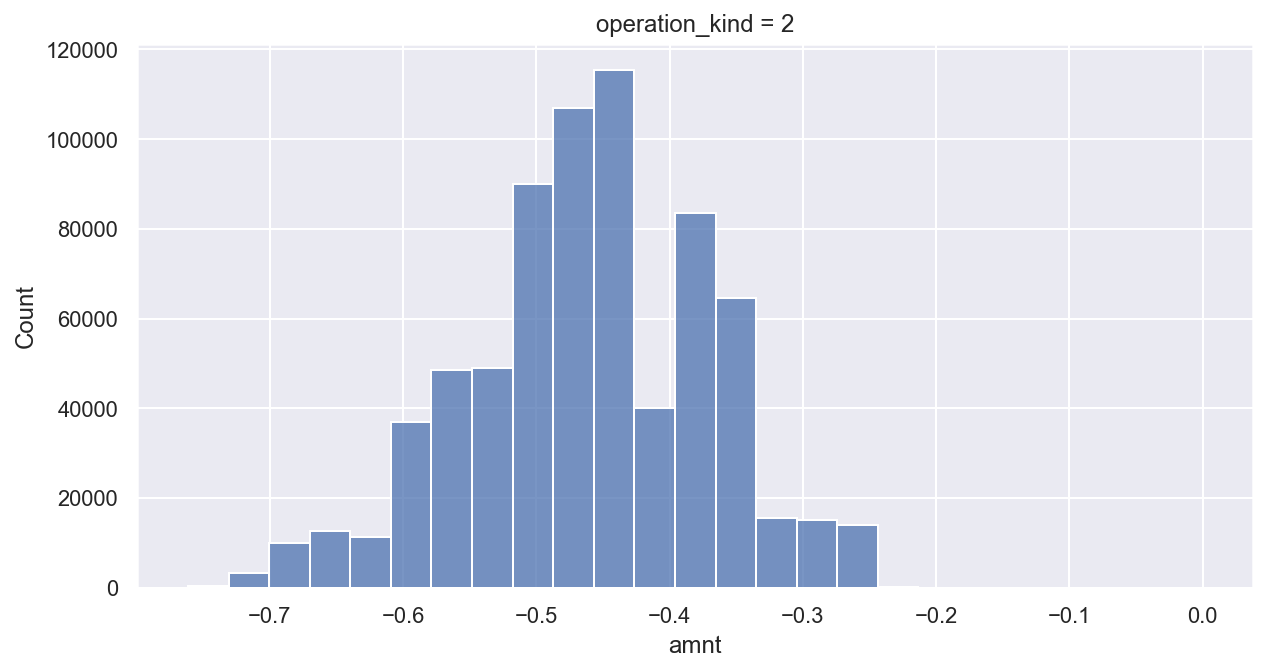

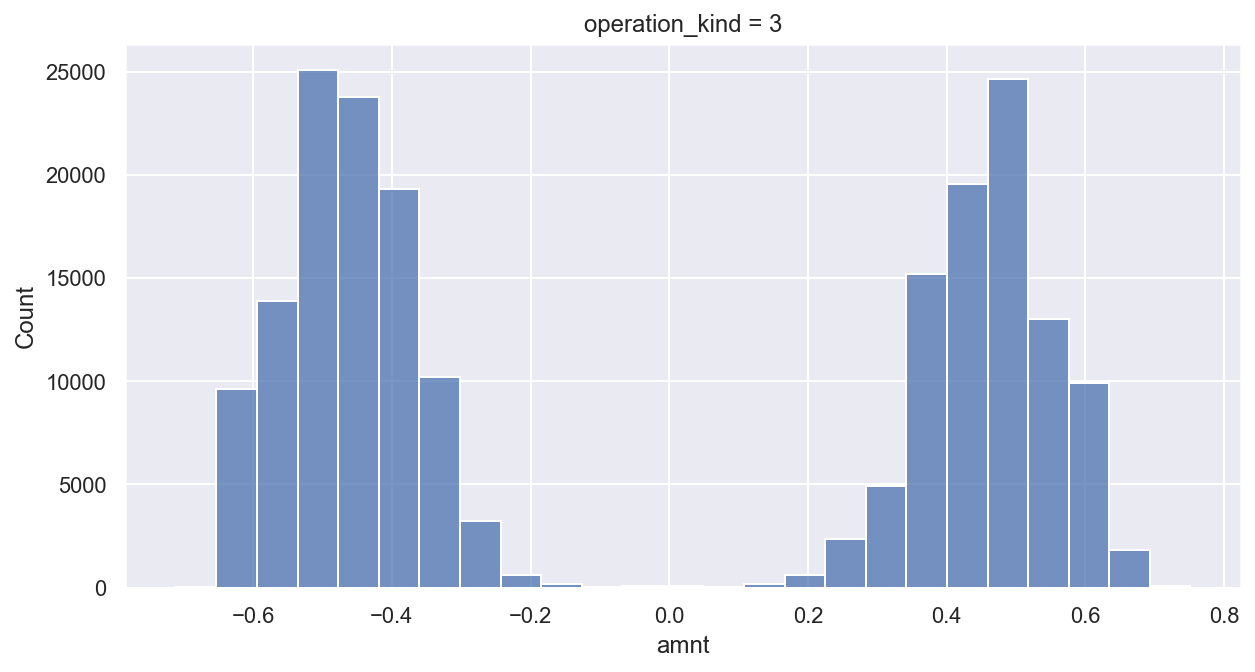

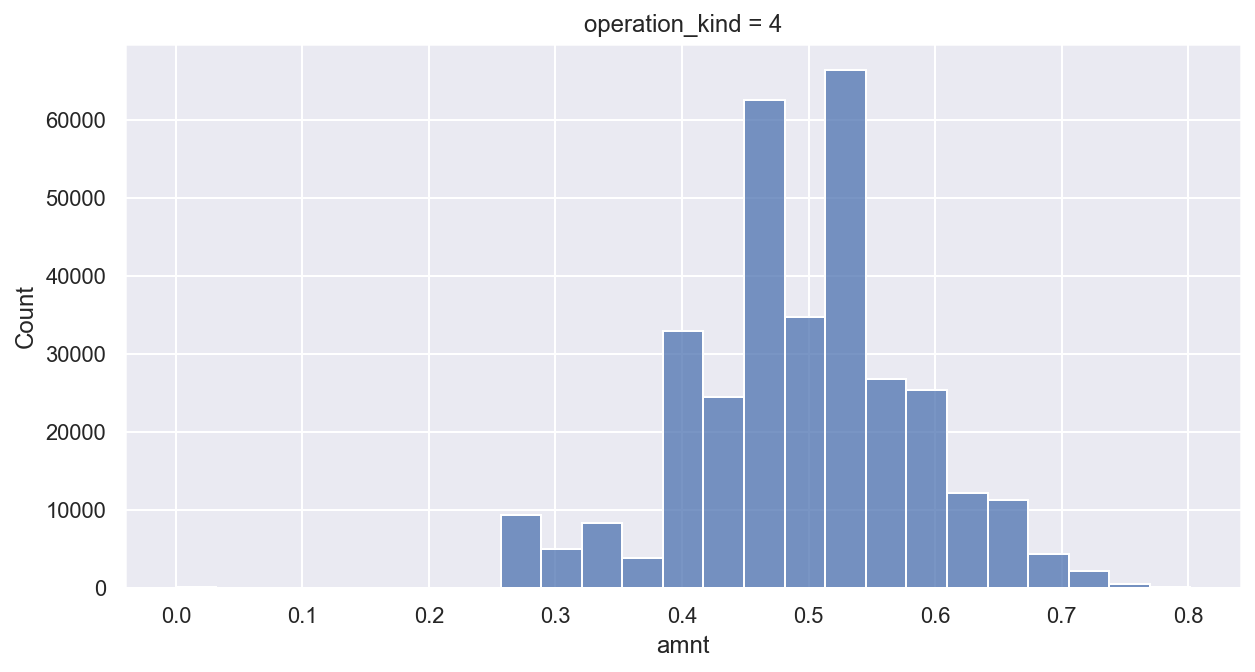

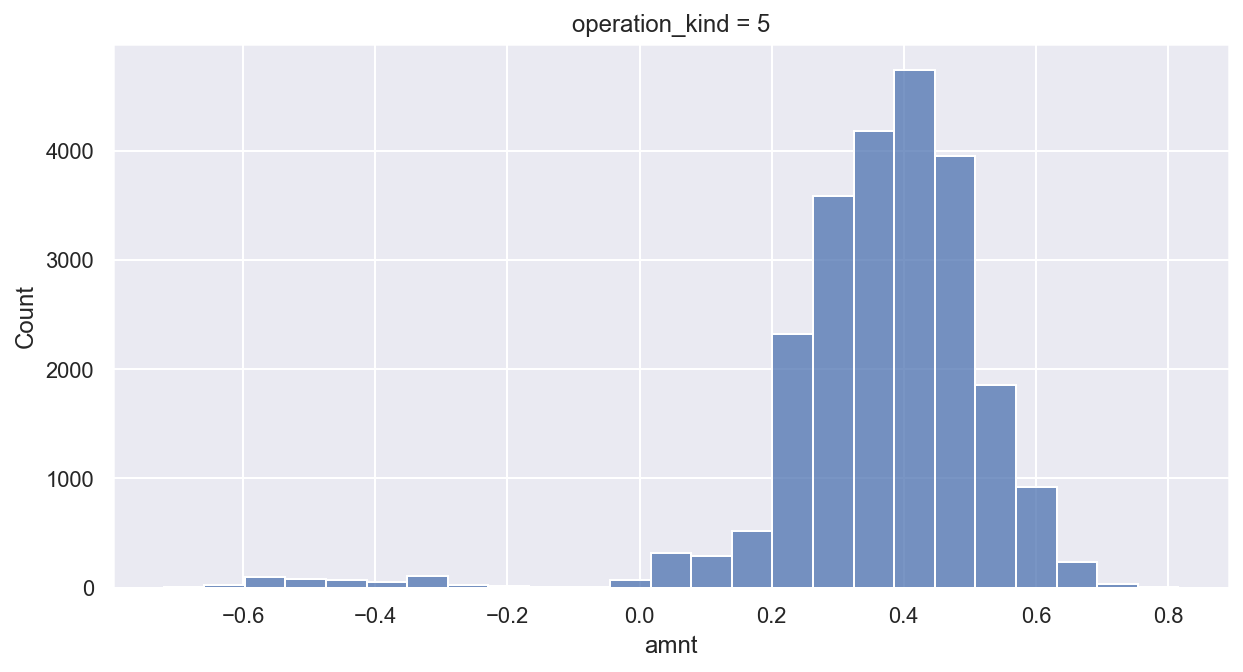

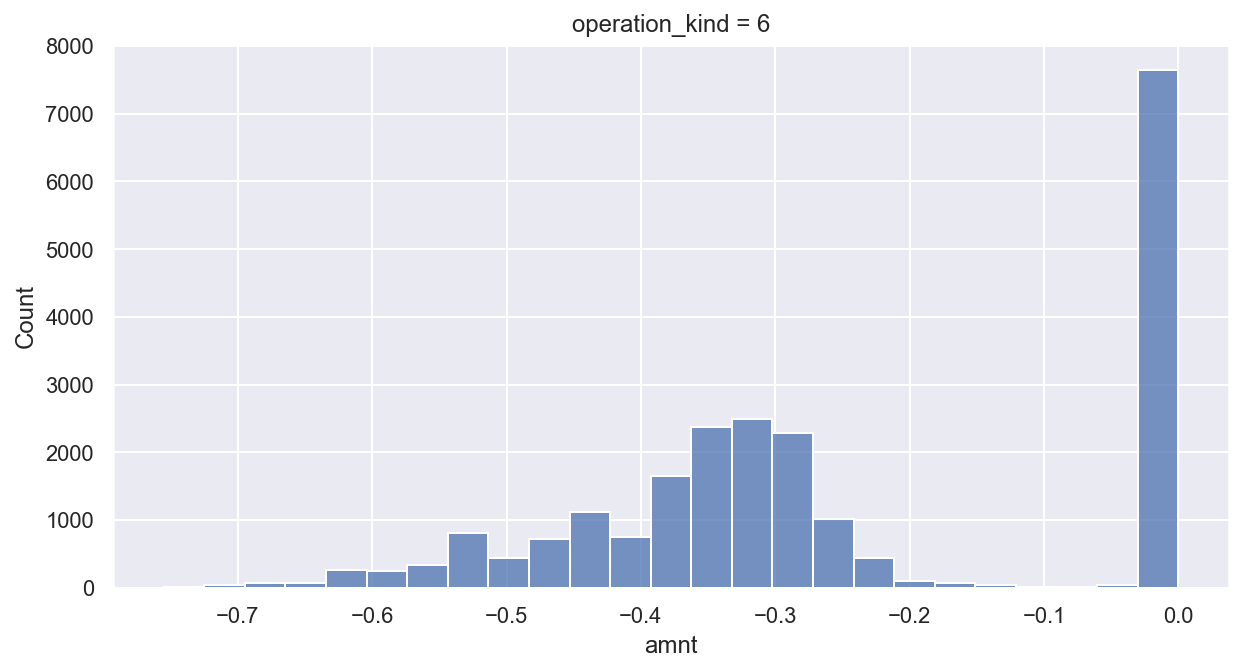

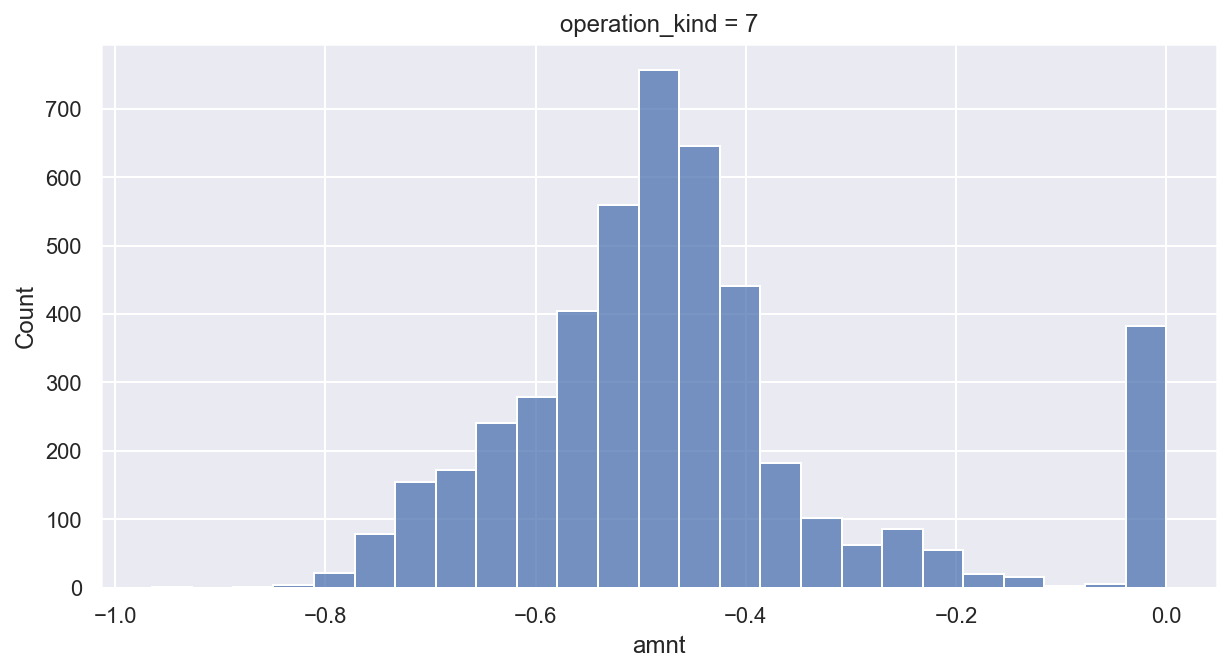

In [61]:
for val in np.sort(file['operation_kind'].unique()):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.histplot(file[file['operation_kind']==val]['amnt'], bins=25, ax = ax)
    plt.title('operation_kind = {}'.format(val))

* Notice that for some types we see only negative/positive transavtions, for others - both, even almost symmetric

* I would like to assume that 'operation_kind = 4' are wages - they occur not very often, as it is supposed to be. At the same time, the mean value is quite big, so possibly it is actually people's salary

In [64]:
file['operation_kind'] = file['operation_kind'].astype(np.int8)
mean_wages = pd.pivot_table(data = file, index=['app_id', 'operation_kind'], aggfunc='mean').query('operation_kind == 4')


* I would like to see how the mean wage is connected with the approval

In [74]:
temp_file = train_target.merge(mean_wages['amnt'], on='app_id', how='outer')[:22743].fillna(0)
temp_file

,app_id,product,flag,amnt
0,0,3,0,0.448969
1,1,1,0,0.404996
2,2,1,0,0.000000
3,3,1,0,0.000000
4,4,1,0,0.000000
...,...,...,...,...
22738,23642,1,0,0.531182
22739,23643,1,0,0.397087
22740,23644,1,0,0.459545
22741,23645,1,0,0.604920


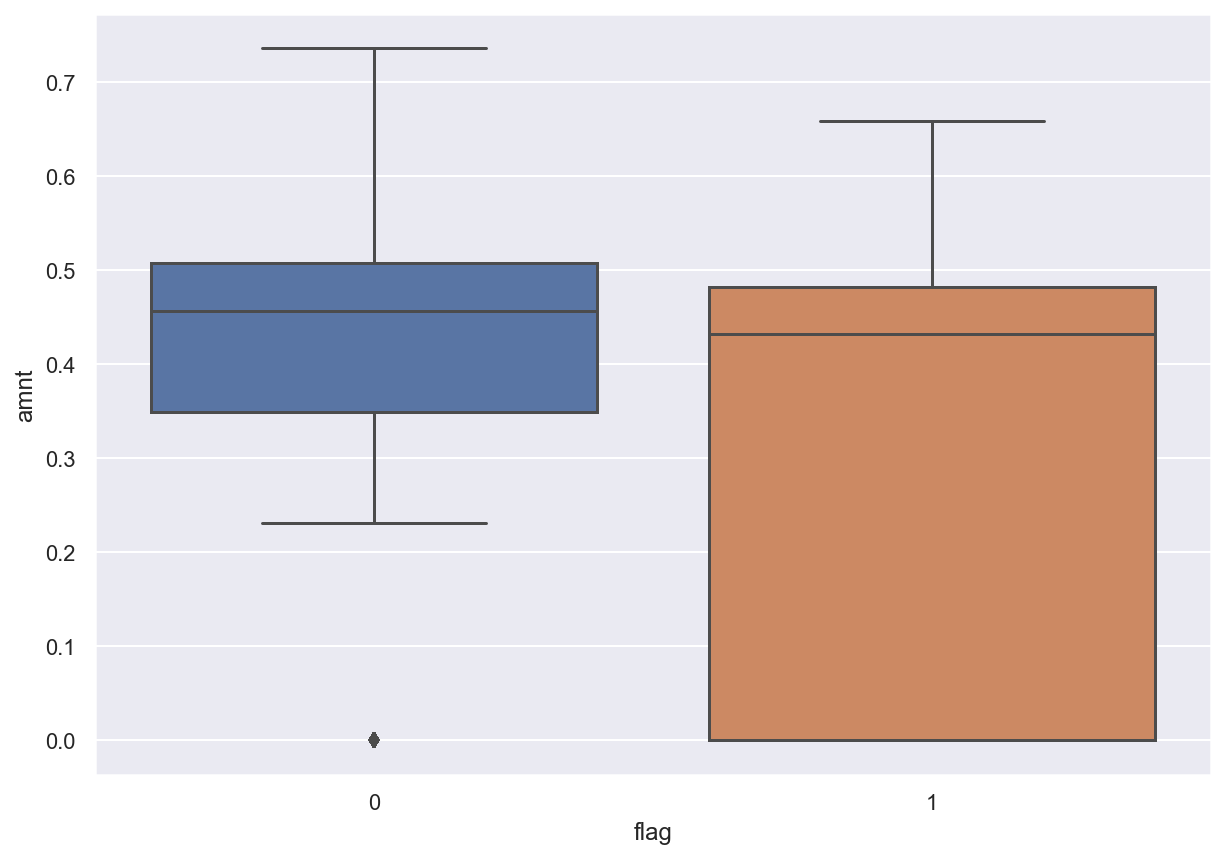

In [77]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(y = temp_file['amnt'], x = temp_file['flag'])
plt.show()

* Since not all people had operations with such type of operation_kind, I filled NaN values with 0

* It's the reason for such a big bias in positive flag

* Nevertheless, some differences may be seen

### Small summary

Right now we know the following:

* income_flag = 1 - charge from the card; income_flag = 2 - add money

* operation_type_group = 1 - credit card; operation_type_group = 2 - debit card

* operation_kind = 4 - probably salary

## Some imagination

* Let's take a look at the cumulative sum of every client in time. I think that it may be turned into a very important feature

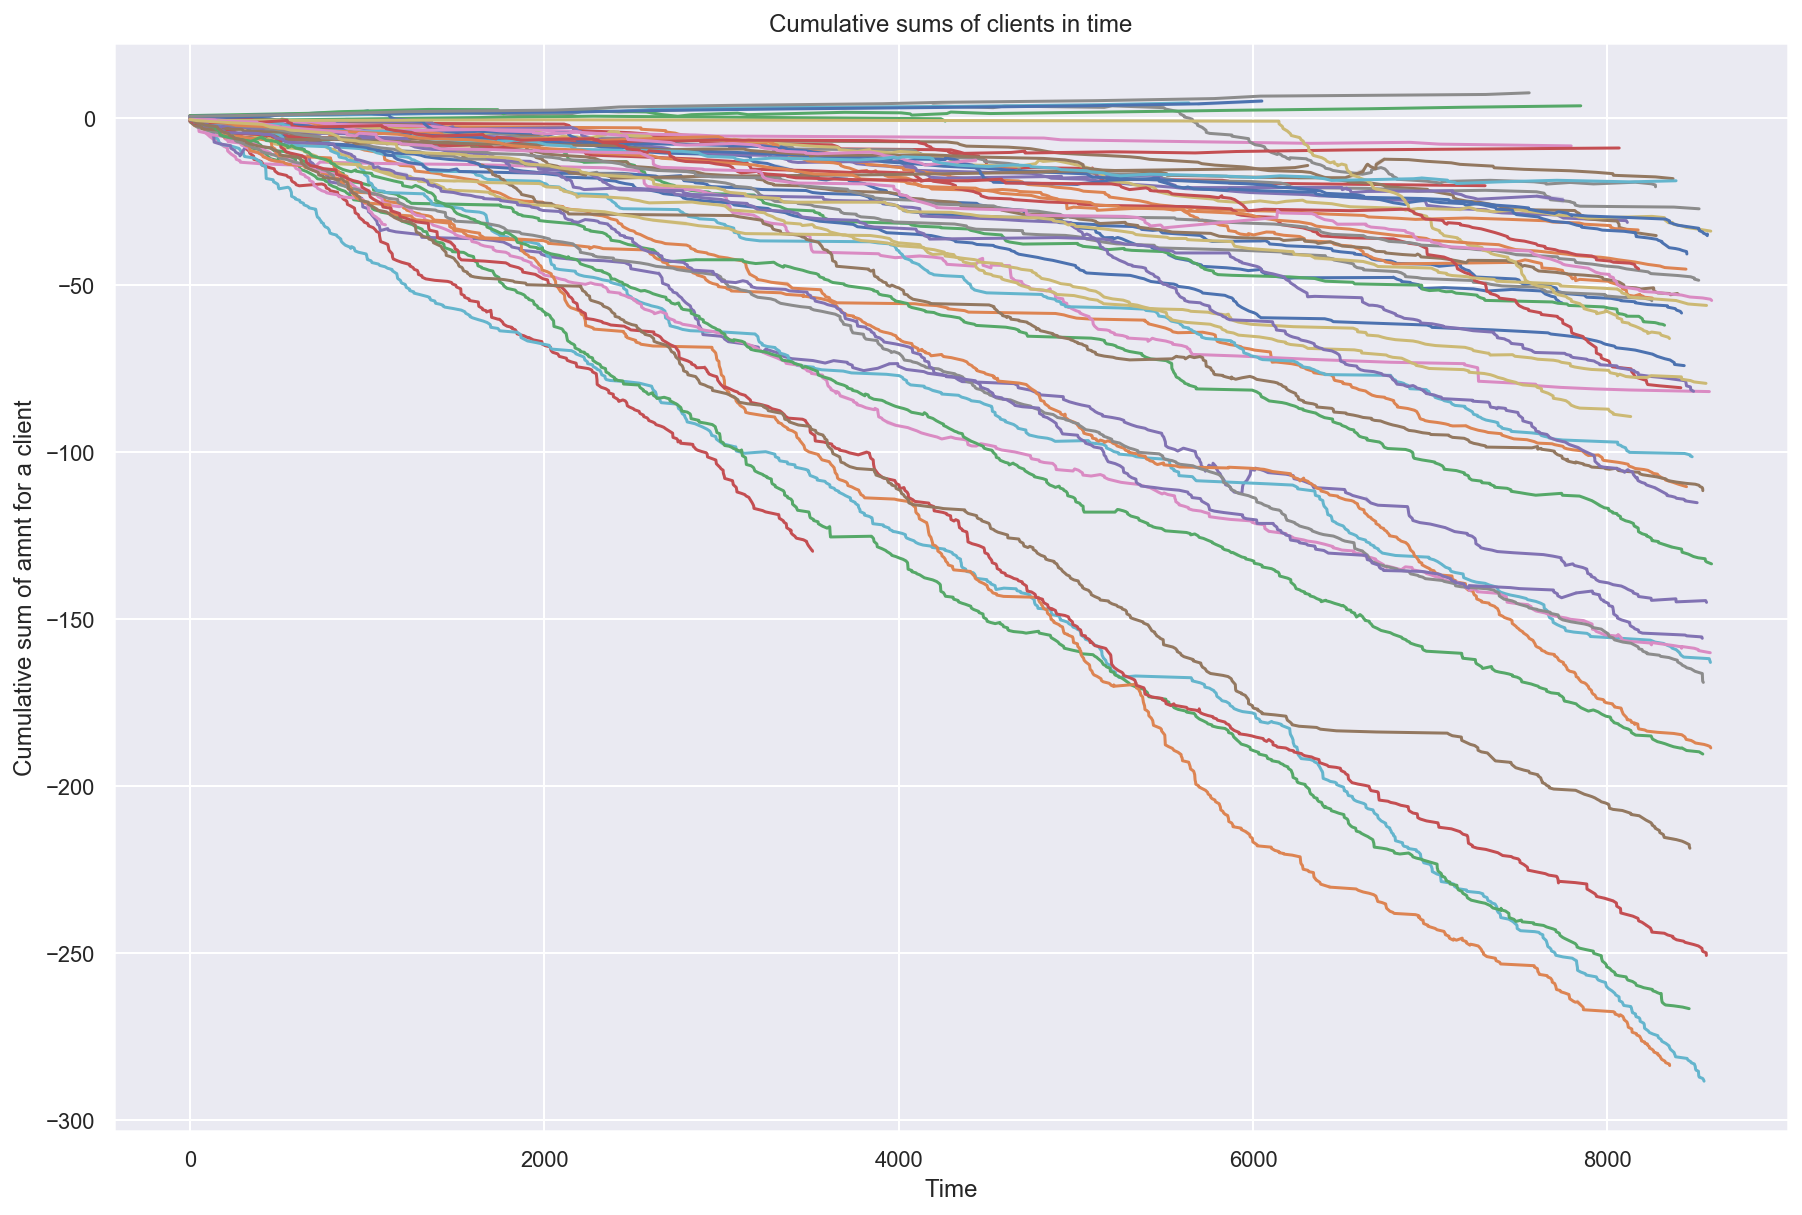

In [95]:
fig, ax = plt.subplots(figsize=(15,10))
for i in range(1, len(thres[:60])):
    l = thres[i-1]
    r = thres[i]
    temp_file = file[l:r]
    amnt = np.cumsum(temp_file['amnt']).values
    time = np.cumsum(temp_file['hour_diff'].values)
    sns.lineplot(x = time, y = amnt)
    plt.xlabel('Time')
    plt.ylabel('Cumulative sum of amnt for a client')
    plt.title('Cumulative sums of clients in time')

* There are about 60 lines on the graph above. We see that most of them have a steady decline - it means that people keep on spending money. I would say that such clients have a bigger probability of default than those, who at least have moments of steady rise or have a constant function.

* I think that it would be useful to find a proxy for the derivative of this function.

* A client whose derivative is negative in most cases are quite likely to defalut in the future; clients with derivative ~ 0 - keep their savings at the same level; clients with positive derivative have the least probability of default. 

* Again, it's just assumptions.